# About The Data

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

# Data Description

The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.
1. "PhotoObj"
     - objid = Object Identifier
     - ra = J2000 Right Ascension (r-band)
     - dec = J2000 Declination (r-band)
       - Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.
     
     - u = better of DeV/Exp magnitude fit
     - g = better of DeV/Exp magnitude fit
     - r = better of DeV/Exp magnitude fit
     - i = better of DeV/Exp magnitude fit
     - z = better of DeV/Exp magnitude fit
       - The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.
     
     - run = Run Number (run number, which identifies the specific scan)
     - rereun = Rerun Number (rerun, specifies how the image was processed)
     - camcol = Camera column (the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run)
     - field = Field number (The field number typically starts at 11 (after an initial rampup time), and can be as large as 800    for particularly long runs)
       - Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels.
     

2. "SpecObj"
    - specobjid = Object Identifier
    - class = object class (galaxy, star or quasar object)
      - The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

    - redshift = Final Redshift (redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.)
    - plate = plate number (Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.)
    - mjd = MJD of observation (Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.)
    - fiberid = fiber ID (The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.) 

# Importing Essential Libraries

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [110]:
#Reading the data
df=pd.read_csv("skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [111]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [112]:
df.shape

(10000, 18)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


1. Apart from the class (Target variable) all of our data is numerical. So, we will be needing encoding for the class column.
2. All the columns are not-null and we have no missing data.

In [114]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [115]:
col = ['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid']
for i in col:
    print(df[i].value_counts(),"\n")

1.237650e+18    10000
Name: objid, dtype: int64 

226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64 

 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64 

18.90212    3
18.99697    3
18.98400    3
19.53507    3
19.56350    3
           ..
19.27596    1
19.51822    1
18.23952    1
18.47838    1
18.77445    1
Name: u, Length: 9730, dtype: int64 

17.55623    3
17.75478    3
17.60766    3
18.31910    3
17.53612    2
           ..
16.79101    1
18.01411    1
16.93613    1
17.68695    1
17.87934    1
Name: g, Length: 9817, dtype: int64 

15.99986    3
16.48978    3
16.70929    2
17.21182    2
16.27899    2
           ..
19.18255    1
16.03177    1
16.27091    1
17.4532

1. We have 3 categories in our target variable and we will be encoding it in the later stages of analysis.

In [116]:
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

1. We dont have any use of ids (objid, specobjid, & fiberid) in our analysis so we will be remvoing it.

In [117]:
df.drop(['objid','specobjid','fiberid'],axis=1,inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 1.1+ MB


In [119]:
df.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000


1. There is very less difference between the mean and 50% of the variables. Therefore, no of outliers will be less.
2. The Ascension r-band varies between 8-260 whereas Declination r-band varies between -5 to 69.
3. The response of the 5 bands of the telescope (u,g,r,i,z) lies between 11 to 29.
4. Whereas redshift lies between range 0.004-5.4.
5. We can observe large deviation in ra. dec, run, field, plate and mjd as most of them are category type.

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis

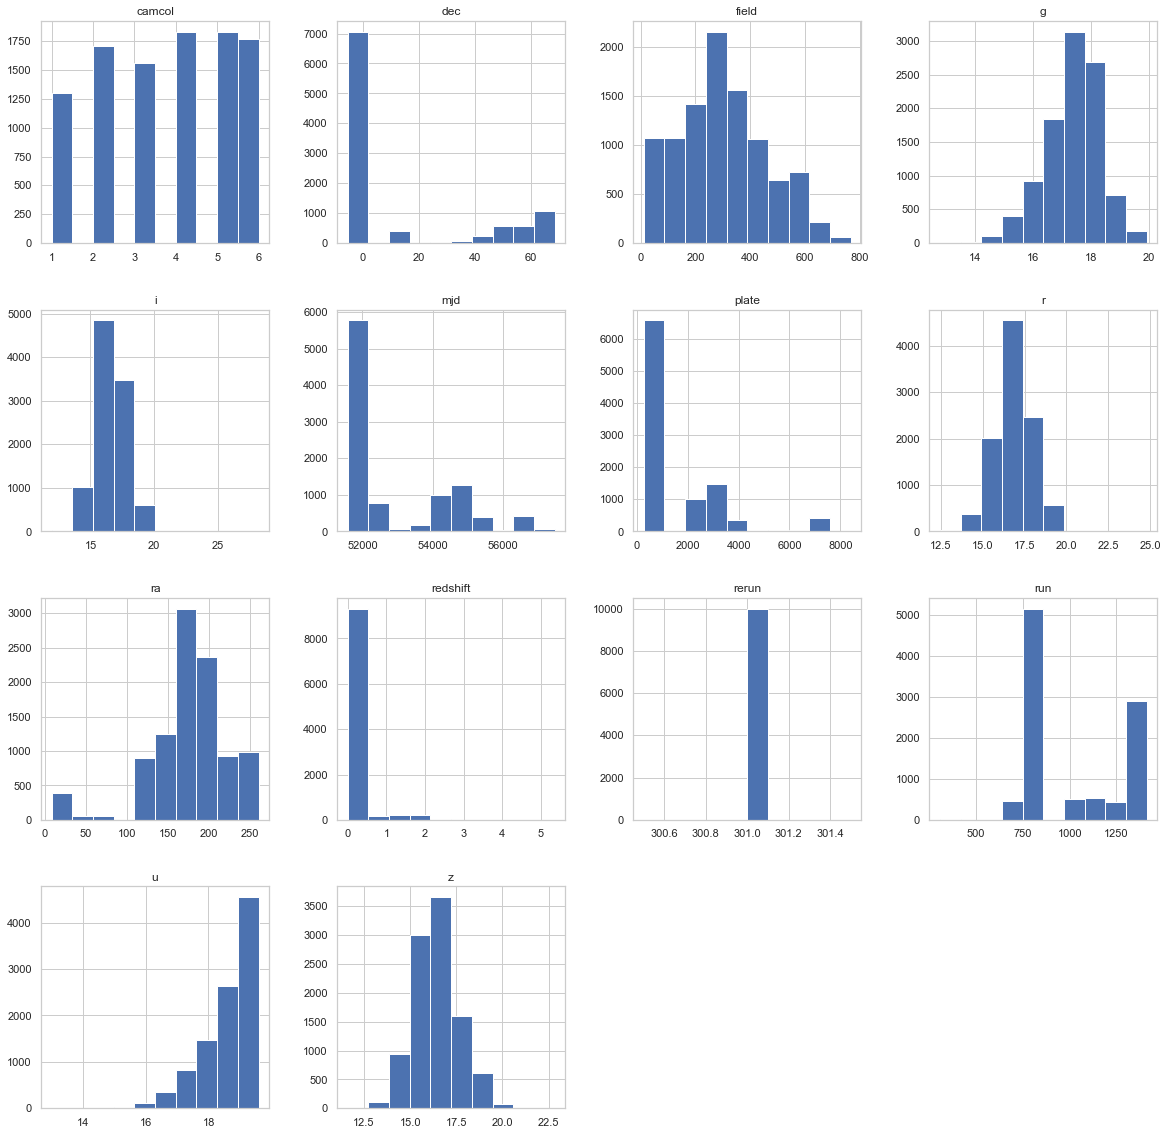

In [120]:
df.hist(figsize=(20,20))
plt.show()

1. By this, we can observe that the variables apart from category type are skewed. 
2. rerun column has only one type of obervation so we will drop it.

In [121]:
df.drop(['rerun'],axis=1,inplace=True)

In [122]:
df['camcol'].value_counts() #This categories of this variable is evenly this distributed,

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

In [123]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

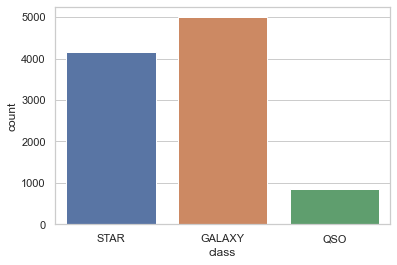

In [124]:
sns.countplot(x="class", data=df)

The Galaxy are the class with highest occurences.

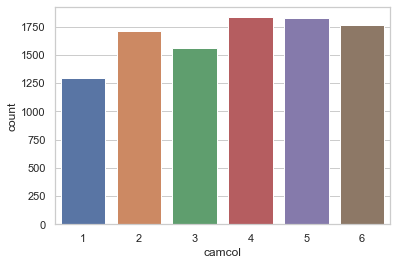

In [125]:
sns.countplot(df['camcol'])

The 4 are the camcol with highest occurences.

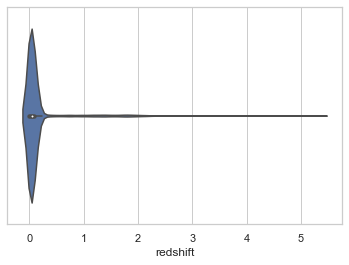

In [126]:
sns.set(style="whitegrid")
sns.violinplot(df["redshift"])
plt.show()

The redshift variable is mostly between range 0-0.3.

# Bi-Variate Analysis

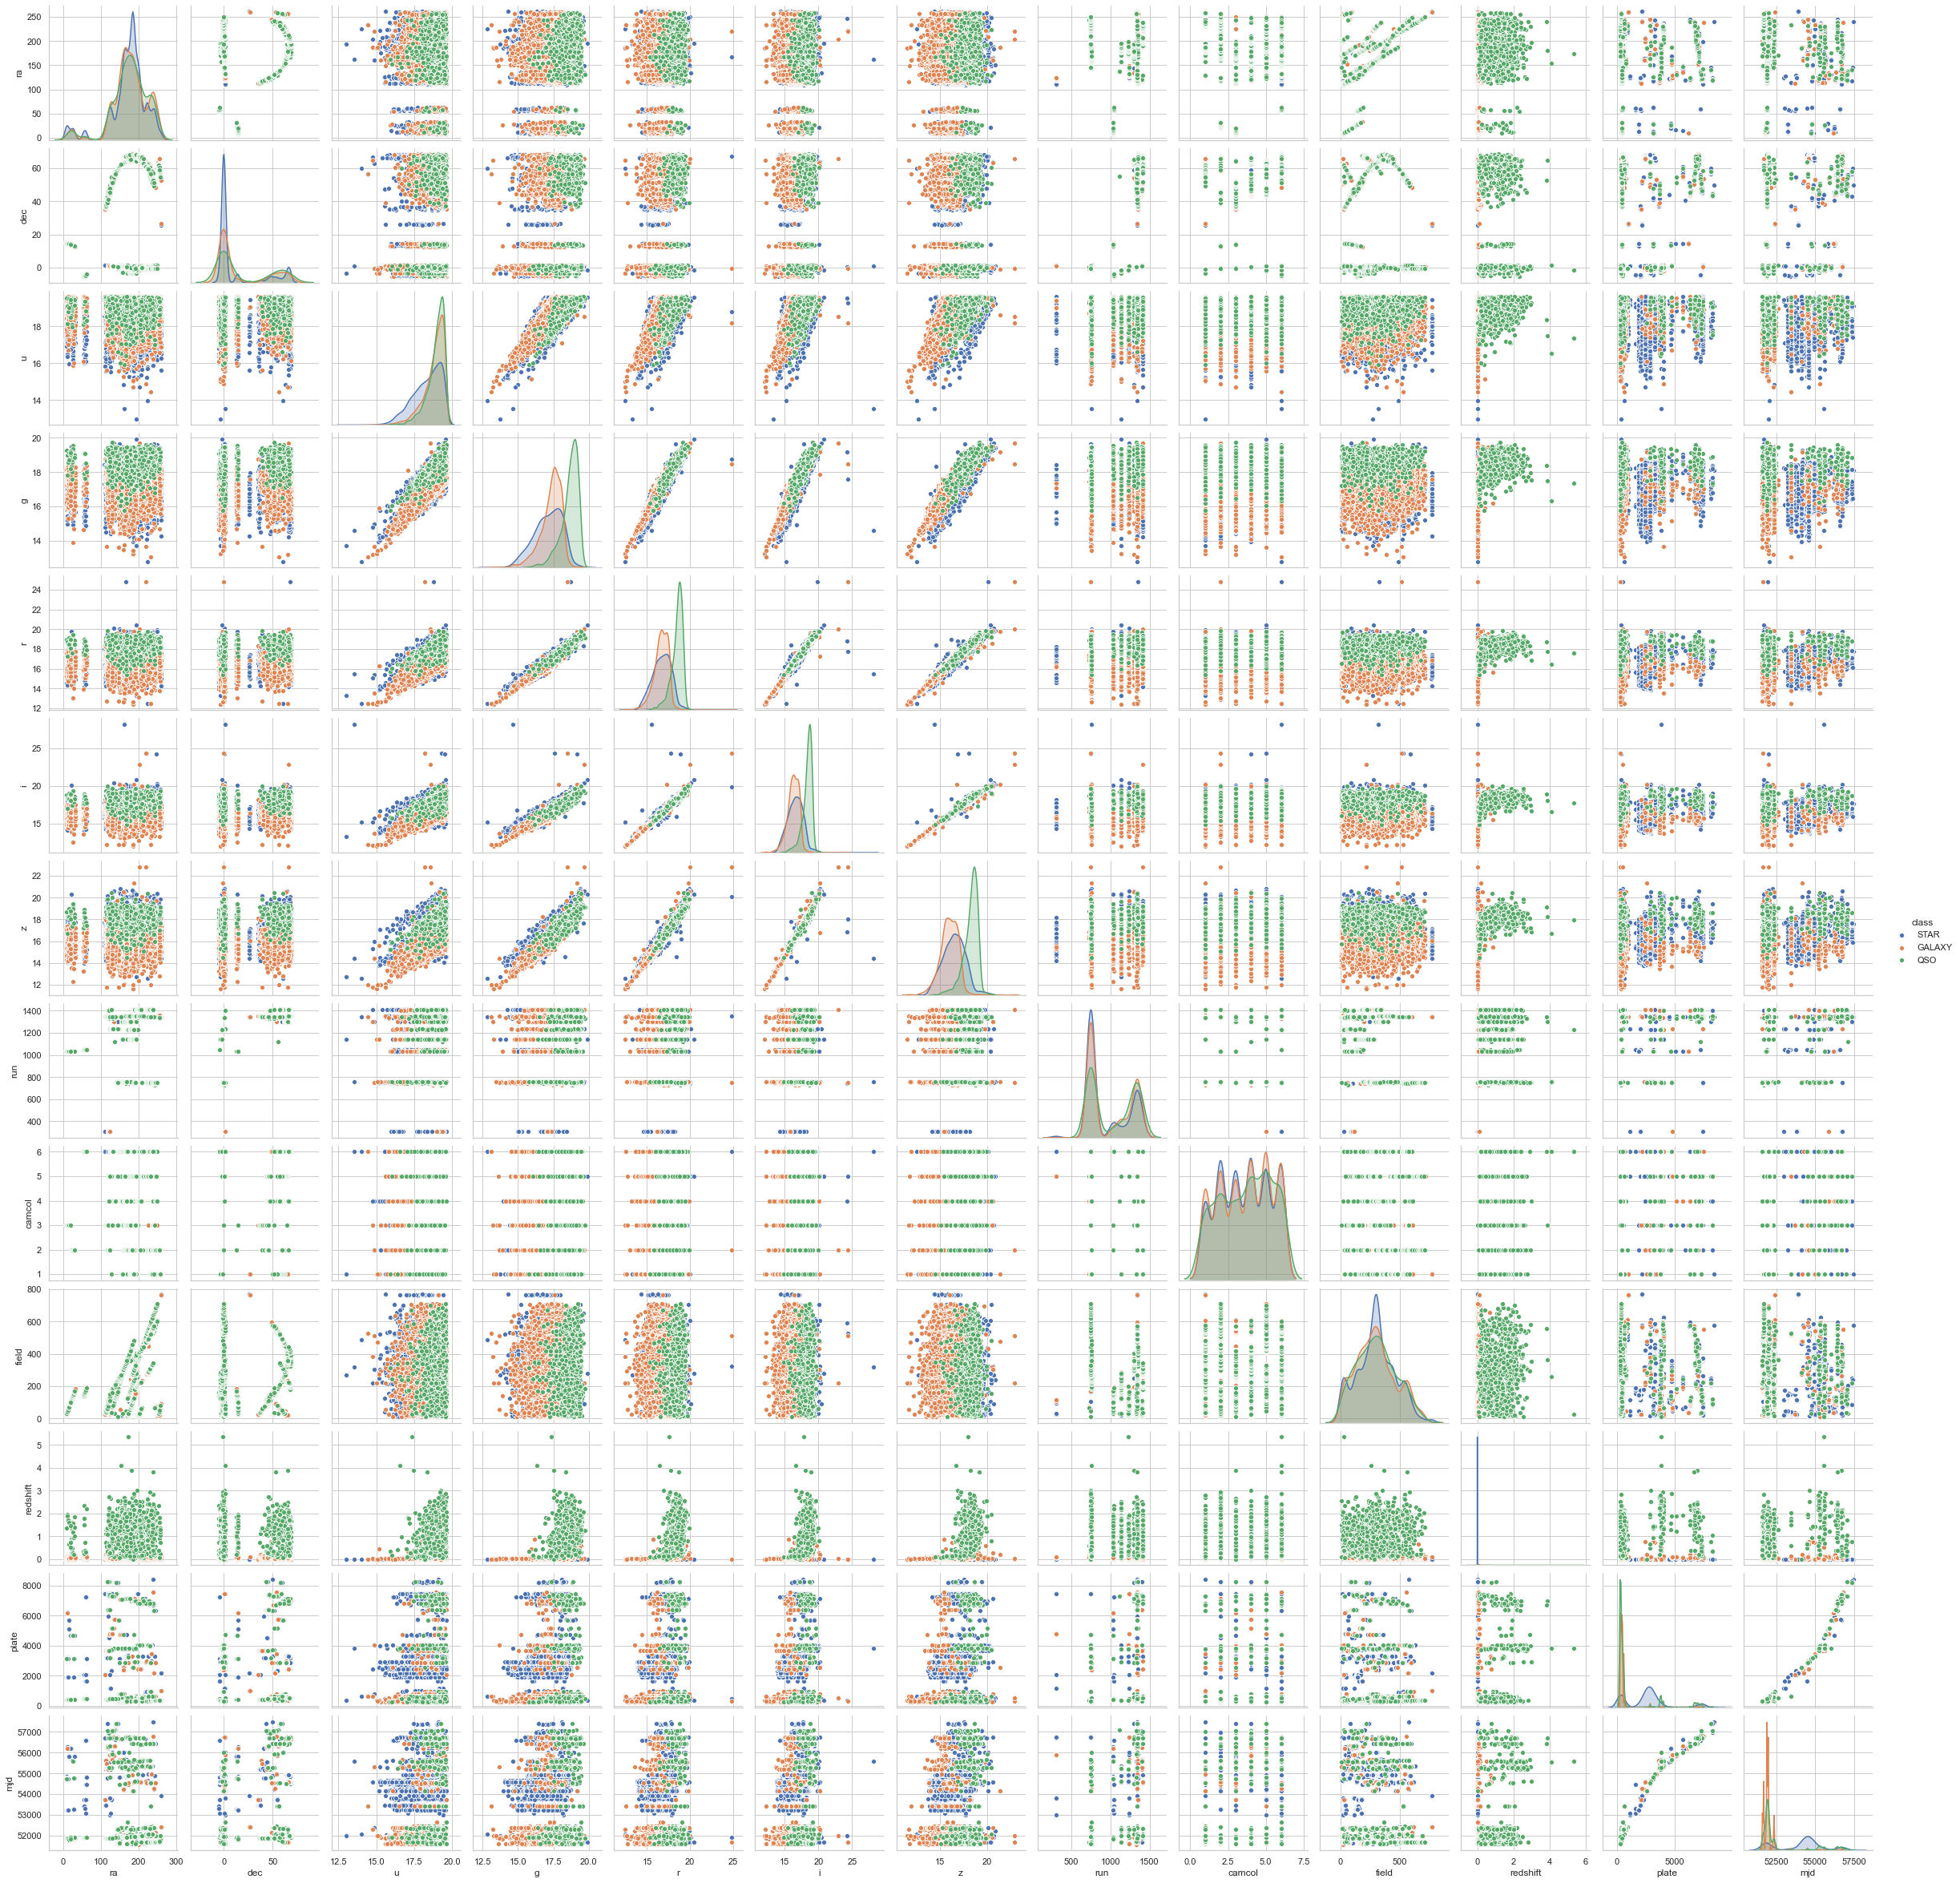

In [127]:
sns.pairplot(df, hue="class")

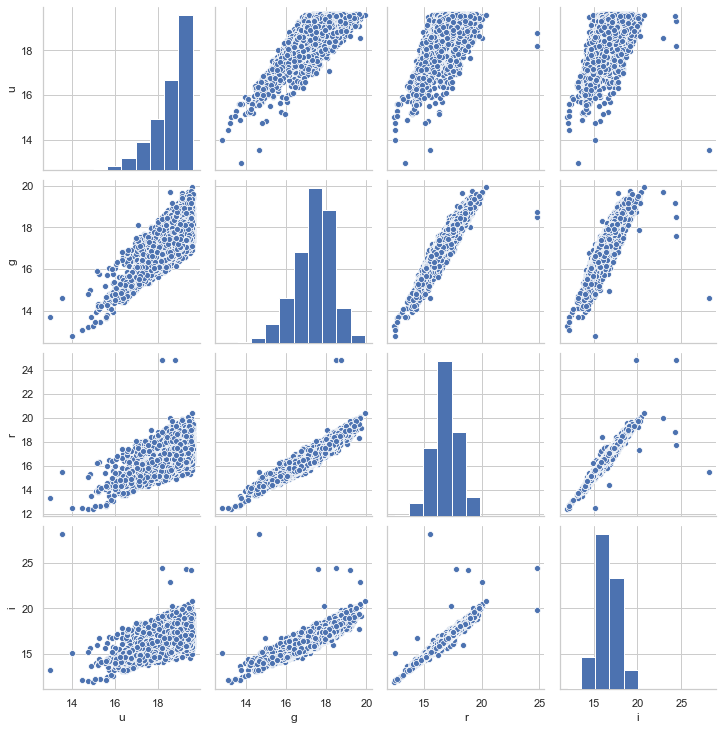

In [128]:
sns.pairplot(df[['u','g','r','i']])

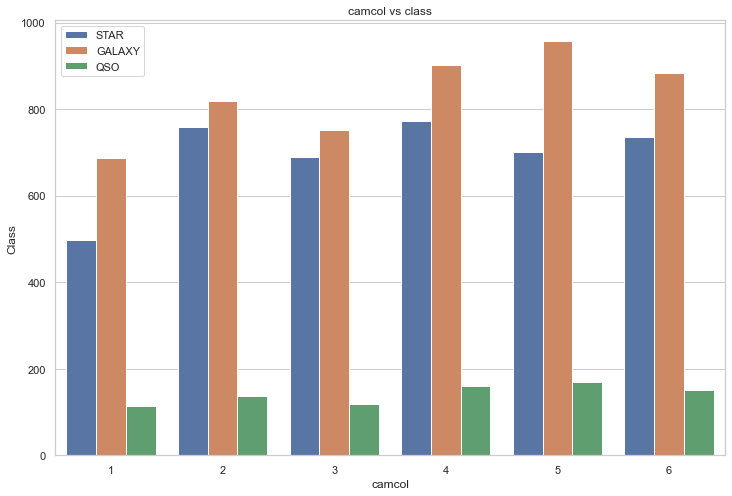

In [129]:
#Pesticide category vs Crop Damage Type 
plt.subplots(figsize=(12,8))
sns.countplot(x='camcol',hue='class',data=df)
plt.title("camcol vs class")
plt.xlabel("camcol")
plt.ylabel("Class")
plt.legend(["STAR","GALAXY","QSO"]);
plt.xticks(rotation=0);

# Correlation

Before finding correlation between the variables we need to change the class to numerical.

In [130]:
#Label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Encoding categorical columns
df['class']= le.fit_transform(df['class'])
print(df.head())

           ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  camcol  field  class  redshift  plate    mjd  
0  752       4    267      2 -0.000009   3306  54922  
1  752       4    267      2 -0.000055    323  51615  
2  752       4    268      0  0.123111    287  52023  
3  752       4    269      2 -0.000111   3306  54922  
4  752       4    269      2  0.000590   3306  54922  


In [131]:
cor=df.corr()
cor

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,-0.043219,0.030307,-0.095329,-0.086887
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,-0.058918,0.067021,0.088342,0.066147
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,-0.269044,0.163741,-0.129430,-0.168793
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,-0.099212,0.407576,-0.054981,-0.092772
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.049628,0.441080,0.019787,-0.009345
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.146791,0.431450,0.072958,0.050896
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.215758,0.424034,0.112397,0.095658
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,-0.078162,0.059056,0.093601,0.070354
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,-0.006186,0.006834,0.040795,0.026284
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,0.007713,0.015414,-0.093723,-0.086558


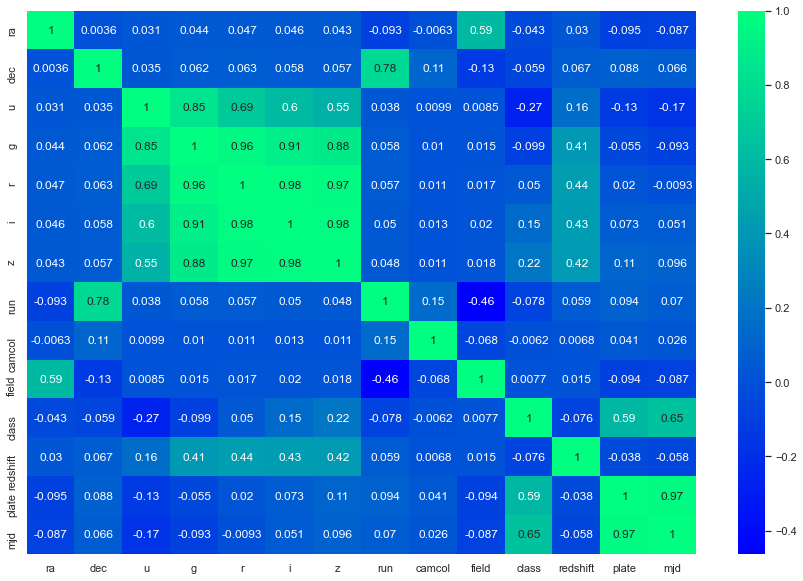

In [132]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap="winter")

1. Highly Correlated to class:
    - plate
    - mjd
    - field
    - 5 bands of the telescope [r,i,z]
2. Less Correlated to class:
    - ra
    - dec
    - redshift

# Plotting Outliers

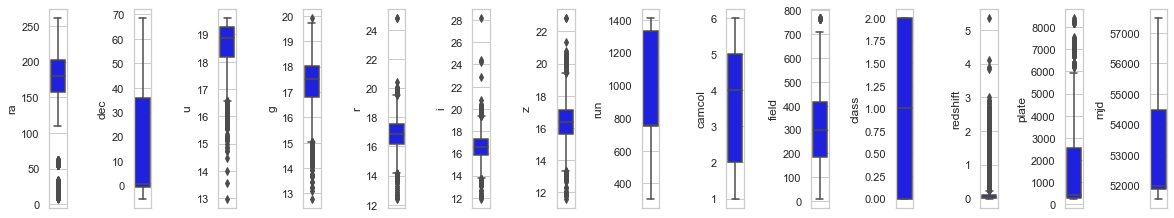

In [133]:
collist=df.columns.values
ncol=17
nrow=10
plt.figure(figsize=(20,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="blue",orient="v")
    plt.tight_layout()

We can observe that variables like ra, u, z and plate are having a high no of outliers.

But the data coming to space station can be very random so we will not be the touching the data.

# Removing Skewness

In [134]:
#Spliitng the data and target variable
df_x=df.drop(['class'],axis=1)
y=df['class']

In [135]:
df_x.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
redshift    0
plate       0
mjd         0
dtype: int64

In [136]:
df_x.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
redshift    4.265729
plate       1.794609
mjd         1.039610
dtype: float64

Apart from redshift the skewness is within limits(-1.5 to 1.5).

In [137]:
#Treating skewness via log method
for col in df_x.columns:
    if df_x[col].skew()>0.7:
        df_x[col]=np.log1p(df_x[col])

# Scaling the Data

In [138]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [143]:
x["dec"].fillna(x["dec"].mean(),inplace=True)

# As our data target variable is categorical there we will be using classification techniques.

# Model Training

In [144]:
#Coverting to train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [145]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [146]:
models= [SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]
for m in models:
    m.fit(x_train,y_train)
    print("Score of ",m," :",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Scores')
    print("Accuracy Score : ",accuracy_score(y_test,predm))     
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  SVC()  : 0.976
Scores
Accuracy Score :  0.9685
--------------------------------------------------------------------------------------------


Score of  DecisionTreeClassifier()  : 1.0
Scores
Accuracy Score :  0.9845
--------------------------------------------------------------------------------------------


Score of  KNeighborsClassifier()  : 0.942375
Scores
Accuracy Score :  0.9155
--------------------------------------------------------------------------------------------


Score of  GaussianNB()  : 0.971375
Scores
Accuracy Score :  0.971
--------------------------------------------------------------------------------------------




As of now, Decision Tree Classifier is giving best results with a score of 100% but we will cross validate it.

In [147]:
#Cross Validating
models= [SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]
for m in models:
    score=cross_val_score(m,x,y,cv=4,scoring="accuracy")
    print("Score of ",m," is :",score)
    print("Mean Score : ",score.mean())
    print("Standard Deviation : ",score.std())
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  SVC()  is : [0.9692 0.9704 0.9636 0.972 ]
Mean Score :  0.9688
Standard Deviation :  0.0031622776601683716
--------------------------------------------------------------------------------------------


Score of  DecisionTreeClassifier()  is : [0.9868 0.9884 0.9832 0.948 ]
Mean Score :  0.9766
Standard Deviation :  0.01661926592843379
--------------------------------------------------------------------------------------------


Score of  KNeighborsClassifier()  is : [0.9212 0.8972 0.8828 0.8924]
Mean Score :  0.8984
Standard Deviation :  0.014147791347061917
--------------------------------------------------------------------------------------------


Score of  GaussianNB()  is : [0.9828 0.9688 0.962  0.9688]
Mean Score :  0.9705999999999999
Standard Deviation :  0.007570997292299092
--------------------------------------------------------------------------------------------




By Cross Validating we came to know that still Decision Tree Classifier will be best for our prediction.

In [151]:
#Decision Tree Classifier is the best model so we will find out it's best parameter using GridSearchCV
from random import randint
param_grid = {'max_depth': [3,None],  
              'min_samples_leaf': [0,1,2,3,4,5,6,7,8,9], 
              'criterion': ['gini','entropy']}  
  
grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [152]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5}
DecisionTreeClassifier(min_samples_leaf=5)


We get best results for DecisionTreeClassifier when criterion = gini and max_depth = None and  min_samples_leaf = 5.

In [153]:
#Using DecisionTreeClassifier method with best parameters
dtc=DecisionTreeClassifier(criterion ='gini', max_depth = None ,min_samples_leaf = 5)
dtc.fit(x_train,y_train)
print("Score of ",dtc," :",dtc.score(x_train,y_train))
preddtc=dtc.predict(x_test)
print('Scores')
print("Accuracy Score : ",accuracy_score(y_test,preddtc))
print("Classification Report : \n",classification_report(y_test,preddtc))
print("Confusion_matrix : ",confusion_matrix(y_test,preddtc))
print("--------------------------------------------------------------------------------------------")
print("\n")

Score of  DecisionTreeClassifier(min_samples_leaf=5)  : 0.993375
Scores
Accuracy Score :  0.989
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.96      0.94      0.95       190
           2       1.00      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

Confusion_matrix :  [[987   7   2]
 [ 12 178   0]
 [  1   0 813]]
--------------------------------------------------------------------------------------------




We are getting an accuracy close to 99% using DecisionTree Classifier but we will try to boost the score by using ensemble techniques.

In [154]:
#Random Forest
rf=RandomForestClassifier(n_estimators=20,random_state=0)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Scores')
print("Accuracy Score : ",accuracy_score(y_test,predrf))
print("Classification Report : \n",classification_report(y_test,predrf))
print("Confusion_matrix : ",confusion_matrix(y_test,predrf))
print("--------------------------------------------------------------------------------------------")
print("\n")

Scores
Accuracy Score :  0.992
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.98      0.96      0.97       190
           2       0.99      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion_matrix :  [[988   3   5]
 [  8 182   0]
 [  0   0 814]]
--------------------------------------------------------------------------------------------




In [155]:
#ADABoost Classifier
ad=AdaBoostClassifier(n_estimators=20,random_state=0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Scores')
print("Accuracy Score : ",accuracy_score(y_test,predad))
print("Classification Report : \n",classification_report(y_test,predad))
print("Confusion_matrix : ",confusion_matrix(y_test,predad))
print("--------------------------------------------------------------------------------------------")
print("\n")

Scores
Accuracy Score :  0.7695
Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       996
           1       0.38      0.56      0.45       190
           2       0.99      0.75      0.86       814

    accuracy                           0.77      2000
   macro avg       0.71      0.71      0.70      2000
weighted avg       0.81      0.77      0.78      2000

Confusion_matrix :  [[822 170   4]
 [ 84 106   0]
 [203   0 611]]
--------------------------------------------------------------------------------------------




This shows that the accuracy score remains same so the best results we get when we are using DecisionTree Classifier model.

# Best Model For Prediction : Decision Tree Classifier

# Saving the Model

In [156]:
import pickle
filename= "Skyserver.pkl"
pickle.dump(dtc,open(filename,'wb'))